In [99]:
import pandas as pd #导入Pandas
df_sales = pd.read_csv('data/易速鲜花订单记录.csv') #载入数据
df_sales.head() #显示头几行数据  

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京


C:\Users\xin\AppData\Local\Temp\ipykernel_14912\641785782.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique() #每个月的订单数量
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\pylabt

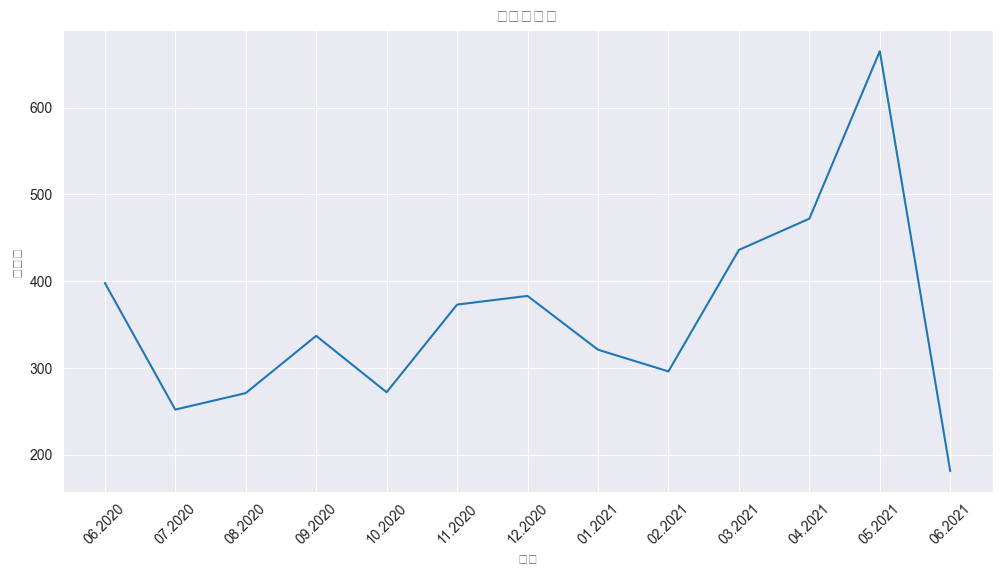

In [100]:
import matplotlib.pyplot as plt #导入Matplotlib的pyplot模块
#构建月度的订单数的DataFrame
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) #转化日期格式
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique() #每个月的订单数量
#设定绘图的画布
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(12,6),legend=False)
ax.set_xlabel('月份') # X轴label
ax.set_ylabel('订单数') # Y轴Label
ax.set_title('月度订单数') # 图题
#设定X轴月份显示格式
plt.xticks(
    range(len(df_orders_monthly.index)), 
    [x.strftime('%m.%Y') for x in df_orders_monthly.index], 
    rotation=45)
plt.show() # 绘图

In [101]:
df_sales = df_sales.drop_duplicates() #删除重复的数据行

In [102]:

df_sales.describe() #df_sales的统计信息

,消费日期,数量,单价,用户码
count,85920,85920.000000,85920.000000,85920.000000
mean,2021-01-04 22:50:58.891759616,10.115747,3.599711,15338.080389
min,2020-06-01 09:09:00,-9360.000000,0.000000,14681.000000
25%,2020-10-03 12:42:00,2.000000,1.250000,15022.000000
50%,2021-01-22 11:45:00,4.000000,1.950000,15334.000000
75%,2021-04-19 13:58:00,12.000000,3.750000,15673.000000
max,2021-06-09 12:31:00,3114.000000,38970.000000,16019.000000
std,NaN,49.114285,134.410498,391.309086


In [103]:
df_sales = df_sales.loc[df_sales['数量'] > 0] #清
df_sales.head()# 洗掉数量小于等于0的数据

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京


In [104]:
df_sales.describe() #

,消费日期,数量,单价,用户码
count,84112,84112.000000,84112.000000,84112.000000
mean,2021-01-05 01:14:46.564342784,10.760236,3.005032,15337.732963
min,2020-06-01 09:09:00,1.000000,0.000000,14681.000000
25%,2020-10-03 12:42:00,2.000000,1.250000,15021.000000
50%,2021-01-22 11:45:00,5.000000,1.950000,15333.000000
75%,2021-04-19 15:08:00,12.000000,3.750000,15674.000000
max,2021-06-09 12:31:00,3114.000000,3155.950000,16019.000000
std,NaN,34.018906,15.365085,392.074855


In [105]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] #计算每单的总价
df_sales.head() #显示头几行数据       

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.5


In [106]:
df_user = pd.DataFrame(df_sales['用户码'].unique()) #生成以用户码为主键的结构df_user
df_user.columns = ['用户码'] #设定字段名
df_user = df_user.sort_values(by='用户码',ascending=True).reset_index(drop=True) #按用户码排序
df_user #显示df_user


,用户码
0,14681
1,14682
2,14684
3,14687
4,14688
...,...
975,16015
976,16016
977,16017
978,16018


In [107]:
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) #转化日期格式
df_recent_buy = df_sales.groupby('用户码').消费日期.max().reset_index() #构建消费日期信息
df_recent_buy.columns = ['用户码','最近日期'] #设定字段名
df_recent_buy['R值'] = (df_recent_buy['最近日期'].max() - df_recent_buy['最近日期']).dt.days #计算最新日期与上次消费日期的天数
df_user = pd.merge(df_user, df_recent_buy[['用户码','R值']], on='用户码') #把上次消费距最新日期的天数（R值）合并至df_user结构
df_user.head() #显示df_user头几行数据

,用户码,R值
0,14681,70
1,14682,187
2,14684,25
3,14687,106
4,14688,7


In [108]:
df_frequency = df_sales.groupby('用户码').消费日期.count().reset_index() #计算每个用户消费次数，构建df_frequency对象
df_frequency.columns = ['用户码','F值'] #设定字段名称
df_user = pd.merge(df_user, df_frequency, on='用户码') #把消费频率整合至df_user结构
df_user.head() #显示头几行数据

,用户码,R值,F值
0,14681,70,7
1,14682,187,2
2,14684,25,390
3,14687,106,15
4,14688,7,324


In [109]:
df_revenue = df_sales.groupby('用户码').总价.sum().reset_index() #根据消费总额，构建df_revenue对象
df_revenue.columns = ['用户码','M值'] #设定字段名称
df_user = pd.merge(df_user, df_revenue, on='用户码') #把消费金额整合至df_user结构
df_user.head() #显示头几行数据

,用户码,R值,F值,M值
0,14681,70,7,498.95
1,14682,187,2,52.00
2,14684,25,390,1201.51
3,14687,106,15,628.38
4,14688,7,324,5579.10


<Axes: title={'center': '新进度分布直方图'}, ylabel='Frequency'>

E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 36827 (\N{CJK UNIFIED IDEOGRAPH-8FDB}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\de

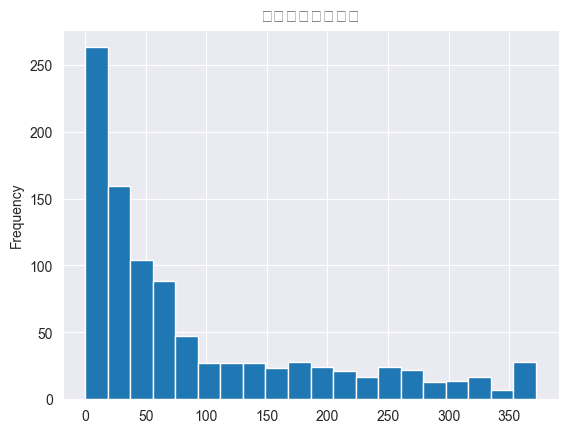

In [110]:
df_user['R值'].plot(kind='hist', bins=20, title = '新进度分布直方图') #R值直方图



<Axes: title={'center': '消费频率分布直方图'}, ylabel='Frequency'>

E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\de

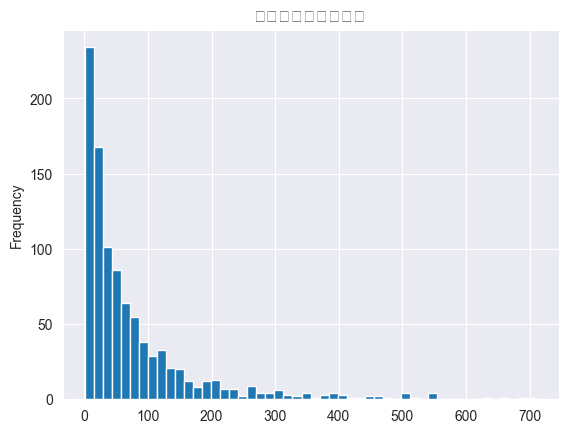

In [111]:
df_user.query('F值 < 800')['F值'].plot(kind='hist', bins=50, title = '消费频率分布直方图') #F值直方图

<Axes: title={'center': '消费金额分布直方图'}, ylabel='Frequency'>

E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\de

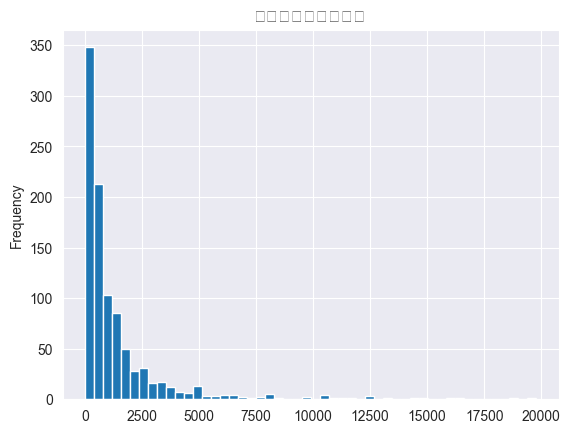

In [112]:
df_user.query('M值 < 20000')['M值'].plot(kind='hist', bins=50, title = '消费金额分布直方图') #M值直方图

In [113]:
from sklearn.cluster import KMeans #导入KMeans模块
def show_elbow(df): #定义手肘函数
    distance_list = [] #聚质心的距离（损失）
    K = range(1,9) #K值范围
    for k in K:
        kmeans = KMeans(n_clusters=k, max_iter=100) #创建KMeans模型
        kmeans = kmeans.fit(df) #拟合模型
        distance_list.append(kmeans.inertia_) #创建每个K值的损失
    plt.plot(K, distance_list, 'bx-') #绘图
    plt.xlabel('k') #X轴
    plt.ylabel('距离均方误差') #Y轴
    plt.title('k值手肘图') #标题

In [114]:
df_user['R值'].describe()

count    980.000000
mean      92.264286
std      100.810437
min        0.000000
25%       17.000000
50%       49.000000
75%      145.250000
max      372.000000
Name: R值, dtype: float64

In [115]:
from sklearn.preprocessing import MinMaxScaler # 导入标准化模块

# 对R值进行反转变换，取最大值减去R值
df_user['R值-反转'] = df_user['R值'].max() - df_user['R值']
scaler = MinMaxScaler() # 创建MinMaxScaler转换器
df_user[['R值-标准化', 'F值-标准化', 'M值-标准化']] = scaler.fit_transform(df_user[['R值-反转', 'F值', 'M值']]) # 标准化R值、F值、M值
df_user.head() # 显示头几行数据


,用户码,R值,F值,M值,R值-反转,R值-标准化,F值-标准化,M值-标准化
0,14681,70,7,498.95,302,0.811828,0.002537,0.008128
1,14682,187,2,52.00,185,0.497312,0.000423,0.000755
2,14684,25,390,1201.51,347,0.932796,0.164482,0.019716
3,14687,106,15,628.38,266,0.715054,0.005920,0.010263
4,14688,7,324,5579.10,365,0.981183,0.136575,0.091922


In [116]:
df_user.head() #显示头几行数据

,用户码,R值,F值,M值,R值-反转,R值-标准化,F值-标准化,M值-标准化
0,14681,70,7,498.95,302,0.811828,0.002537,0.008128
1,14682,187,2,52.00,185,0.497312,0.000423,0.000755
2,14684,25,390,1201.51,347,0.932796,0.164482,0.019716
3,14687,106,15,628.38,266,0.715054,0.005920,0.010263
4,14688,7,324,5579.10,365,0.981183,0.136575,0.091922


E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 31163 (\N{CJK UNIFIED IDEOGRAPH-79BB}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\dev\anaconda3\envs\machine-learning-note\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) Arial.
  func(*args, **kwargs)
E:\de

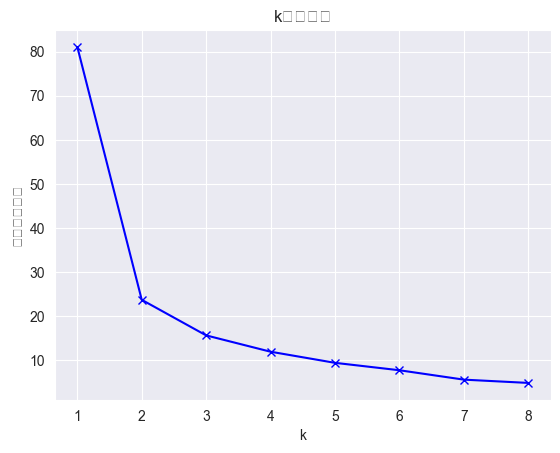

In [117]:
show_elbow(df_user[['R值-标准化', 'F值-标准化', 'M值-标准化']]) #绘制手肘图

In [118]:
kmeans = KMeans(n_clusters=3) #创建KMeans模型
kmeans.fit(df_user[['R值-标准化', 'F值-标准化', 'M值-标准化']]) #拟合模型

KMeans(n_clusters=3)

In [119]:
df_user['类别'] = kmeans.predict(df_user[['R值-标准化', 'F值-标准化', 'M值-标准化']]) #预测类别

In [120]:
df_user['类别'].value_counts() #统计每个类别的用户数量

类别
0    664
2    178
1    138
Name: count, dtype: int64

In [121]:
df_user.groupby('类别').describe() #显示每个类别的统计信息

用户码                                                                  \
    count          mean         std      min       25%      50%       75%   
类别                                                                          
0   664.0  15351.576807  391.332866  14681.0  15021.75  15357.0  15680.25   
1   138.0  15350.942029  349.947019  14693.0  15101.75  15329.0  15653.50   
2   178.0  15347.820225  373.304319  14682.0  15042.75  15345.5  15664.50   

                R值              ...    F值-标准化           M值-标准化            \
        max  count        mean  ...       75%       max  count      mean   
类别                              ...                                        
0   16019.0  664.0   32.088855  ...  0.053383  1.000000  664.0  0.034760   
1   16010.0  138.0  298.094203  ...  0.010994  0.082030  138.0  0.011443   
2   16006.0  178.0  157.162921  ...  0.024630  0.097674  178.0  0.014667   

                                                                
         std       min       25%       50%       75%       max  
类别                                                              
0   0.079873  0.000000  0.006567  0.015069  0.033466  1.000000  
1   0.062695  0.000145  0.002197  0.004113  0.006255  0.734465  
2   0.049644  0.000755  0.003896  0.007590  0.014793  0.658297  

[3 rows x 64 columns]

In [123]:
# 显示20行数据
df_user.head(20)

,用户码,R值,F值,M值,R值-反转,R值-标准化,F值-标准化,M值-标准化,类别
0,14681,70,7,498.95,302,0.811828,0.002537,0.008128,0
1,14682,187,2,52.00,185,0.497312,0.000423,0.000755,2
2,14684,25,390,1201.51,347,0.932796,0.164482,0.019716,0
3,14687,106,15,628.38,266,0.715054,0.005920,0.010263,2
4,14688,7,324,5579.10,365,0.981183,0.136575,0.091922,0
5,14689,208,13,112.80,164,0.440860,0.005074,0.001758,2
6,14690,43,48,355.05,329,0.884409,0.019873,0.005754,0
7,14691,30,71,2114.33,342,0.919355,0.029598,0.034772,0
8,14692,136,68,591.55,236,0.634409,0.028330,0.009655,2
9,14693,263,8,172.90,109,0.293011,0.002960,0.002750,1
